                                                            US ACCIDENTS EXPLORATORY DATA ANALYSIS

*This dataset is collected in real time using multiple Traffic-APIs of accidents in the US from Feb 2016 to Dec 2021 .*

*   Source - *Kaggle*
*   Data Timeframe - *Feb 2016 to Dec 2021*
*   Data Size - *2.8 million records*









                                                         BUSINESS QUESTIONS 

*   *Does temperature of the place have any effect on the accidents ?*

*   *Which 5 states have the highest accidents ?*

*   *What time of the day are the accidents more frequent ?*

*   *Which days of the week have most accidents ?*

*   *Which month of the year have most accidents ?*

*   *What is trend of accidents of the year ( increasing / decreasing )* .









      MAIN GOAL IS TO ANALYZE THE RELATION BETWEEN THE ACCIDENTS AND OTHER FACTORS WHICH MIGHT BE THE  REASON BEHIND THE ACCIDENTS .

In [1]:
pip install opendatasets --upgrade --quiet

IMPORTING  THE  DATASET  FROM  KAGGLE  USING  A  API TOKEN 

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinyaasshetty
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 152MB/s]


In [3]:
dataset = './us-accidents/US_Accidents_Dec21_updated.csv'

##DATA  PREPARATION  &  CLEANING .

*   *Loading  the  file  in  pandas*.
*   *Look  at  the  data &  fix some any missing or incorrect values* .
*   *Also fix any duplicated or wrong format values*.



In [4]:
import pandas as pd 
import seaborn as sb

In [5]:
df = pd.read_csv(dataset)

In [6]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
#Finding more about the dataset .

df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

FINDING THE STATISTICS OF NUMERICAL DATA .

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


INDENTIFYING THE NUMBER OF NUMERIC & NON-NUMERIC COLUMNS IN THE DATASET .

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # these are different generics of numerical data .

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

14

FINDING THE PERCENTAGE OF MISSING VALUES PER COLUMN .

In [11]:
def missing_values(df):

  total = (df.isnull().sum().sort_values(ascending = False)) 
  percent = (((df.isnull().sum().sort_values(ascending = False)) / len(df)) * 100) 
  return (pd.concat([total,percent] , axis = 1 , keys = ['total' , 'percentage ']))

miss_values = missing_values(df)
print(miss_values[miss_values!=0])

                           total  percentage 
Number                 1743911.0    61.290031
Precipitation(in)       549458.0    19.310789
Wind_Chill(F)           469643.0    16.505678
Wind_Speed(mph)         157944.0     5.550967
Wind_Direction           73775.0     2.592834
Humidity(%)              73092.0     2.568830
Weather_Condition        70636.0     2.482514
Visibility(mi)           70546.0     2.479350
Temperature(F)           69274.0     2.434646
Pressure(in)             59200.0     2.080593
Weather_Timestamp        50736.0     1.783125
Airport_Code              9549.0     0.335601
Timezone                  3659.0     0.128596
Nautical_Twilight         2867.0     0.100761
Civil_Twilight            2867.0     0.100761
Sunrise_Sunset            2867.0     0.100761
Astronomical_Twilight     2867.0     0.100761
Zipcode                   1319.0     0.046356
City                       137.0     0.004815
Street                       2.0     0.000070
Country                      NaN  

PLOT  A  GRAPH  FOR  THE  MISSING  VALUES BY CONSIDERING COLUMNS HAVING ONLY MISSING VALUES

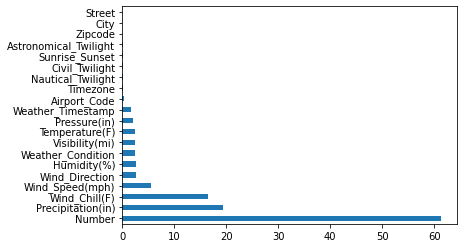

In [12]:
graph_values = ((df.isnull().sum().sort_values(ascending = False)) / len(df)) * 100
graph_values[graph_values!=0].plot(kind = 'barh')

*If you have large number of missing values in a particular column of a dataset , it is better to remove those columns as they wont be helping in your analysis in any way .*

( OR ) 

*You can also drop all the values in dataset containing null values .*

In [13]:
df.drop('Number' , axis = 1 , inplace = True)

CHECKING FOR DUPLICATED VALUES 

In [14]:
df[df.duplicated()]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


## EXPLORATORY ANALYSIS & VISUALIZATION




*LET US PICK SOME COLUMNS FOR VISUALIZING & MAKE SENSE OF THE DATA .*

In [15]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

COLUMNS WE WILL PICK FOR ANALYZING : 

*   City
*   start_time
*   Start_lat , Start_lng
*   Weather condition 












###City

CHECKING THE NUMBER OF UNIQUE CITIES .

In [16]:
df1 = (df.City.unique())
print(len(df1))

11682


CALCULATING THE NUMBER OF ACCIDENTS PER CITY .

In [17]:
#top 10 cities with highest number of accidents 
cities_with_accidents = df['City'].value_counts().sort_values(ascending = False )
cities_with_accidents[:10]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

*BUT WE CAN FIND HERE THAT THERE ISNT NEW-YORK IN THE CITY COLUMNS INSPITE OF NEW-YORK BEING ONE OF THE IMPORTANT CITIES IN AMERICA .*

In [18]:
'New York' in df.City

False

In [19]:
'NY' in df.State

False

VISUALIZING THE CITIES WITH ACCIDENTS ( top 20 )

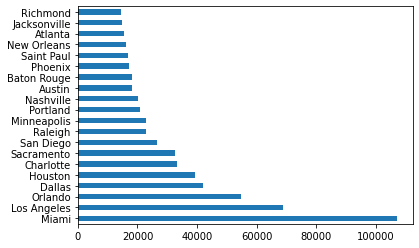

In [20]:
cities_with_accidents[:20].plot(kind = 'barh')

CHECK THE DISTRIBUTION OF ACCIDENTS AMONG VARIOUS CITIES 

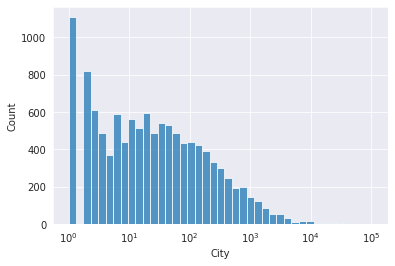

In [21]:
sb.set_style('darkgrid')
sb.histplot(cities_with_accidents , log_scale = True )

*HERE WE CAN SEE THAT MOST OF THE CITIES HAVE LESS THAN 1000 ACCIDENTS*

SO WE NEED TO CREATE 2 BUCKETS OF DATA WITH CITIES HAVING HIGH ACCIDENTS & LOW ACCIDENTS .

In [22]:
high_accidents = cities_with_accidents[cities_with_accidents > 1000]
(len(high_accidents)/len(df1)) * 100

4.228727957541517

*LESS THAN 5% PERCENT OF THE CITIES HAVE ACCIDENTS HAVE MORE THAN 1000 ACCIDENTS ANNUALLY*

In [23]:
low_accidents = cities_with_accidents[cities_with_accidents < 1000]
len(low_accidents)/len(df1) * 100

95.74559150830338

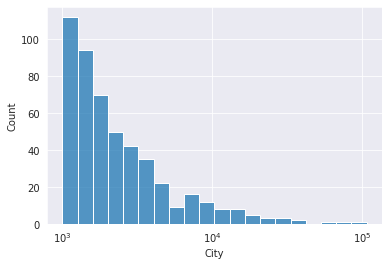

In [24]:
sb.histplot(high_accidents , log_scale = True)

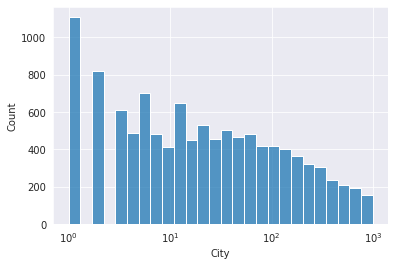

In [25]:
sb.histplot(low_accidents , log_scale = True)

In [26]:
cities_with_accidents[cities_with_accidents < 25]

#almost 50% of the cities have less than 25 accidents in 4 years.

Laceyville                      24
Wyckoff                         24
Currie                          24
Gore                            24
Avonmore                        24
                                ..
De Graff                         1
Township 9                       1
Elida                            1
Old Tappan                       1
American Fork-Pleasant Grove     1
Name: City, Length: 6256, dtype: int64

###Start Time

In [27]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

*THIS IS OF STRING DATA-TYPE WHICH NEED TO BE CONVERTED TO DATE-TIME DATA-TYPE FOR ANALYSIS.*

In [28]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

*LETS ANALYZE ON WHICH HOUR OF THE DAY THERE IS MORE ACCIDENTS .*

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


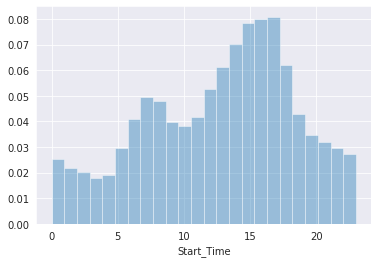

In [29]:
sb.distplot(df.Start_Time.dt.hour , bins = 24 , kde = False , norm_hist = True) 



*  *A high percentage of accidents occur between 12pm to 6pm of the day . ( probably since its lunch hours and also some people maybe getting to work ).*

*   *Also there is a high spike in accidents in 7am & 8am in the morning . ( probably its because of people are in a hurry to get to work ).* 


NOW LETS ANALYZE ON WHICH DAY OF THE WEEK HAS MORE ACCIDENTS 

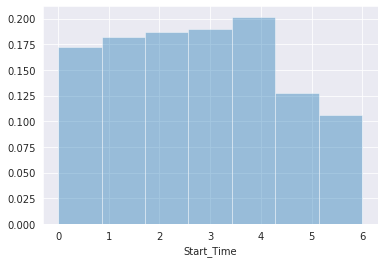

In [30]:
sb.distplot(df.Start_Time.dt.dayofweek , bins = 7 , kde = False , norm_hist = True) 

Here 0 - Monday & 6 - Sunday.

*  *Here we can see that there is less number of accidents on weekends as less people work on weekends*
*   *Here 0 - Monday & 6 - Sunday*


BUT WE NEED TO CHECK WHETHER THE DISTRIBUTION OF ACCIDENTS BY HOUR OF THE DAY THE SAME ON A WEEKEND DAY AS A WEEKDAY ? ( because more people travel on weekends out of time ) .



*We will compare the number of accidents in a day on a hourly basis for sunday and another comparison for a monday & see if the distribution is similar*

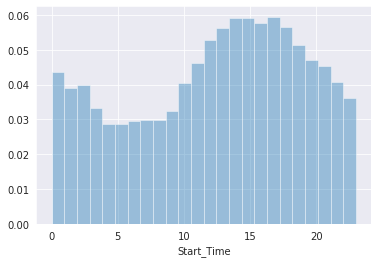

In [31]:
# will create a new dataframe that inlcudes only accidents from 'sunday'.

sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sb.distplot(sundays_start_time.dt.hour , bins = 24 , kde = False , norm_hist = True)

*So as we can see on sundays also we have majority of accidents occurring around 12pm to 8pm . ( as people tend to wake up late on weekends so their day starts late.)*

*Also we can observe there is a spike in accidents in around midnight 12am - 3am( which is probably due to weekend partying or drunk accidents )*

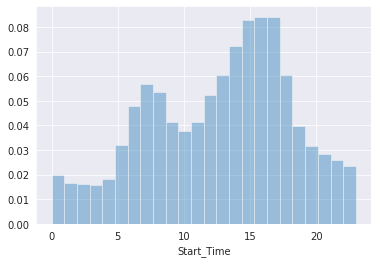

In [32]:
# will create a new dataframe that inlcudes only accidents from 'monday'.

mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sb.distplot(mondays_start_time.dt.hour , bins = 24 , kde = False , norm_hist = True)

*But on mondays we can see the normal distribution as of on any weekdays.*

LETS ANALYZE THE NUMBER OF ACCIDENTS BY THE MONTH AND SEE THE TREND .

ALSO WE CAN CHECK WHETHER THE ACCIDENTS AND WEATHER CONDITIONS ARE RELATED .

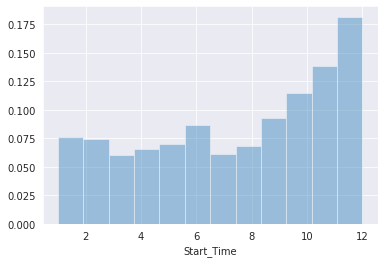

In [33]:
sb.distplot(df.Start_Time.dt.month , bins = 12 , kde = False , norm_hist = True)

It looks like more accidents are happening in October , November & December .

*   *Fewer accidents are happening in summer & more accidents are happening in winter.(probably due to less road grip of the vehicles due to thick ice)*

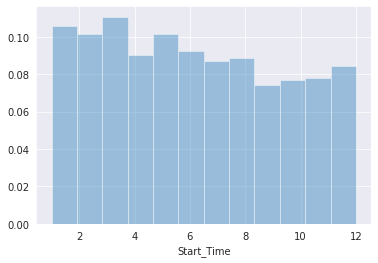

In [34]:
df_2016 = df[df.Start_Time.dt.year == 2017]
sb.distplot(df_2016.Start_Time.dt.month , bins = 12 , kde = False , norm_hist = True)

NOTE : *Some data is missing in 2016 ( jan ) & also in 2020 ( july & august )*

###Start_Lat & Start_Lng

In [35]:
#reviewing the type of data in Start_Lat
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [36]:
#reviewing the type of data in Start_Lng
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

Since the dataset is very huge it will be very much time consuming and difficult to interpret the visualization of the entire dataset.

*Instead we will be taking only 10% percent of the sample of the data set and have a quick insight about it .*

In [37]:
#creating a sample containing only 10% percent of the dataset

sample_df = df.sample(int(0.1 * len(df)))

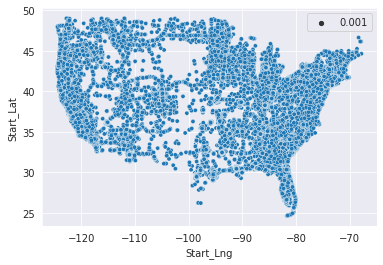

In [38]:
#plotting a scatter-plot graph for the sample data .

sb.scatterplot( x = sample_df.Start_Lng , y = sample_df.Start_Lat , size = 0.001)

##Weather_Condition

In [39]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [40]:
(df.Weather_Condition.value_counts()/len(df)) * 100

Fair                        38.912510
Mostly Cloudy               12.791397
Cloudy                      12.257472
Partly Cloudy                8.784146
Clear                        6.109037
                              ...    
Sleet / Windy                0.000035
Mist / Windy                 0.000035
Blowing Sand                 0.000035
Heavy Freezing Rain          0.000035
Thunder and Hail / Windy     0.000035
Name: Weather_Condition, Length: 127, dtype: float64

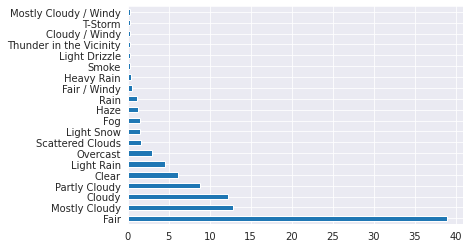

In [41]:
weather = (df.Weather_Condition.value_counts()/len(df)) * 100
weather[:20].plot(kind = 'barh')

*We can see that there isnt much proof whether accidents are caused due to bad weather conditions as 39% percent of accidents have occurred when there was a normal weather* 

*Although we can observe that 24% of accidents have occured during a cloudy weather but its difficult to imply that is the sole cause of the accidents ( lack of proof ).*

##SUMMARY & CONCLUSION 


*   *It is important to note that there is no data of New York city inspite of it being one of the highly populated cities & having dense traffic .*


*   *Also some data are missing from Jan 2021 , July 2020 & August 2020.*




*   *95 % of the cities have less than 1000 accidents over the span of 4 years*

*   *Over 1200 cities have reported having only 1 or 2 accidents from 2016-2021.( needs to investigated as the data seems to be wrong )*.

In [42]:
#finding out which day has the highest accidents and which day of week has lowest accidents.

day_total = df.Start_Time.dt.dayofweek.value_counts()
print(day_total.sort_values(ascending = False))

4    492074
3    463477
2    455037
1    443968
0    419821
5    311691
6    259274
Name: Start_Time, dtype: int64



*   *We can see here Friday has the highest number of accidents ( 492074 ) & Sunday has least number of accidents ( 259274 ) .*




In [43]:
#Similarly we can also find which month has the highest & lowest accidents .

month_total = df.Start_Time.dt.month.value_counts()
print(month_total.sort_values(ascending = False))

12    473943
11    360696
10    299131
9     241822
6     226561
1     198365
2     194995
5     181944
8     178670
4     171880
7     159111
3     158224
Name: Start_Time, dtype: int64



*   *As we can see December has the highest number of accidents ( this maybe due to the snow which leads to less road-grip of the vehicle .*




*   *The Severity of accidents also can be seen below with its distribution .*
*  *Level of Severity ranges from 1 to 4 . ( where 4 is termed as most severe accidents )*

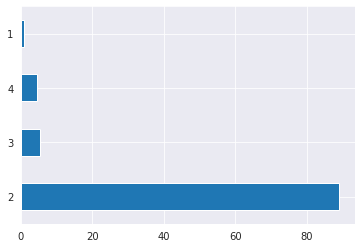

In [44]:
#to generate a visualization of the severity of accidents .\

severity_total = (df.Severity.value_counts()/len(df.Severity)) * 100
severity_total.plot(kind = 'barh')

*We can see that Severity of 2 has about 85 % percent of the accidents .*

In [45]:
# top 5 states having the highest number of accidents

df.State.value_counts().sort_values(ascending = False)[:5]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
Name: State, dtype: int64